# <b>1 <span style='color:#9146ff'>|</span> Import Libraries</b>  

In [ ]:
# Importing libraries for data handling
import pandas as pd
import numpy as np
from scipy import stats

# Importing libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px 


# Importing libraries for data preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.experimental import enable_iterative_imputer  # Needed for IterativeImputer

# Importing machine learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
# Importing pipeline and metrics
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import roc_auc_score, precision_score, recall_score, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE, RandomOverSampler  
from imblearn.combine import SMOTEENN

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


# load dataset


In [8]:
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")   
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
# check info
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
# convert datatype for 'TotalCharges'
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce') 

In [11]:
# drop missing values
df.dropna(inplace=True)

# drop customerID 
df.drop('customerID', axis=1, inplace=True) 

In [12]:
# check missing value
print(df.isnull().sum()) 

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [13]:
df.shape

(7032, 20)

In [14]:
df=df.drop_duplicates()

In [15]:
df.shape

(7010, 20)

# Prepare Data For The model 

In [16]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['category', 'object']).columns

# Apply OneHotEncoder
encoder = OneHotEncoder(sparse=False)  
encoded_data = encoder.fit_transform(df[categorical_cols])

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Drop the original categorical columns from the DataFrame
df.drop(columns=categorical_cols, inplace=True)

# Reset index of the DataFrame
df.reset_index(drop=True, inplace=True)

# Concatenate the original DataFrame with the encoded DataFrame
df = pd.concat([df, encoded_df], axis=1) 

In [17]:
df.drop('Churn_No', axis=1, inplace=True)


In [18]:
df.head()
 

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0,34,56.95,1889.50,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,2,53.85,108.15,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,0,45,42.30,1840.75,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,2,70.70,151.65,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [19]:
# rename churn_yes to churn
df.rename(columns={'Churn_Yes': 'Churn'}, inplace=True) 

In [20]:
# split data into X and y
X = df.drop('Churn', axis=1)
y = df['Churn']
# data into train and split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

# Building  8 Models

In [21]:
from scipy.stats import uniform ,randint 

sm = SMOTEENN()
X_res, y_res = sm.fit_resample(X, y)

Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_res, y_res, test_size=0.2)

Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_res, y_res, test_size=0.2)

# Initialize an empty list to store model scores
model_scores = []

# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42),
        {'n_estimators': [50, 100, 200],
         'max_depth': [None, 10, 20]}),  # Add hyperparameters for Random Forest
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42),
        {'n_estimators': [50, 100, 200],
         'learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for Gradient Boosting
    ('Support Vector Machine', SVC(random_state=42, class_weight='balanced'),
        {'C': [0.1, 1, 10],
         'gamma': ['scale', 'auto']}),  # Add hyperparameters for SVM
    ('Logistic Regression', LogisticRegression(random_state=42, class_weight='balanced'),
        {'C': [0.1, 1, 10],
         'penalty': ['l1', 'l2']}),  # Add hyperparameters for Logistic Regression

    ('Decision Tree', DecisionTreeClassifier(random_state=42),
        {'max_depth': [None, 10, 20],
         'min_samples_split': [2, 5, 10]}),  # Add hyperparameters for Decision Tree
    ('Ada Boost', AdaBoostClassifier(random_state=42),
        {'n_estimators': [50, 100, 200],
         'learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for Ada Boost
    ('XG Boost', XGBClassifier(random_state=42),
        {'max_depth': randint(3, 6), 
         'learning_rate': uniform(0.01, 0.2),  
         'n_estimators': randint(100, 300),  
         'subsample': uniform(0.8, 0.2)}),  # Add hyperparameters for XG Boost
    ('Naive Bayes', GaussianNB(), {})  # No hyperparameters for Naive Bayes
]


# Pipeline & Hyperparameter Tuning & Evaluation Metrics 

Model: Random Forest
Test Accuracy: 0.955 %
Precision: 0.963
Recall: 0.952
Confusion Matrix:
[[520  23]
 [ 30 594]]
ROC AUC: 0.955



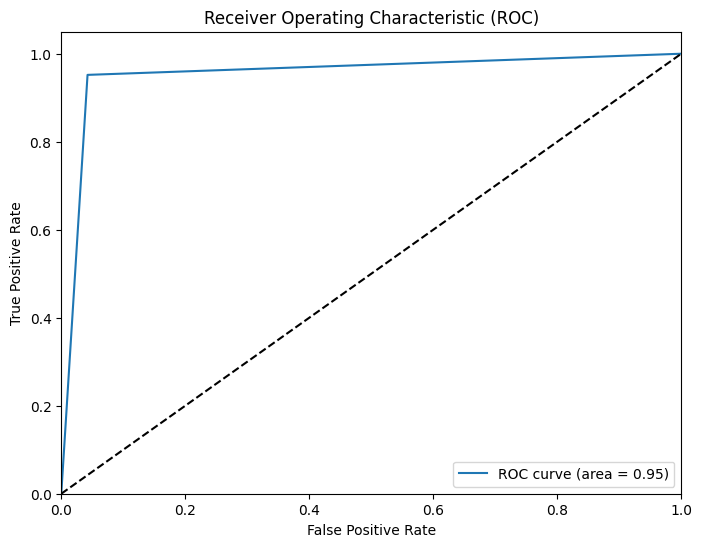

Model: Gradient Boosting
Test Accuracy: 0.967 %
Precision: 0.982
Recall: 0.957
Confusion Matrix:
[[532  11]
 [ 27 597]]
ROC AUC: 0.968



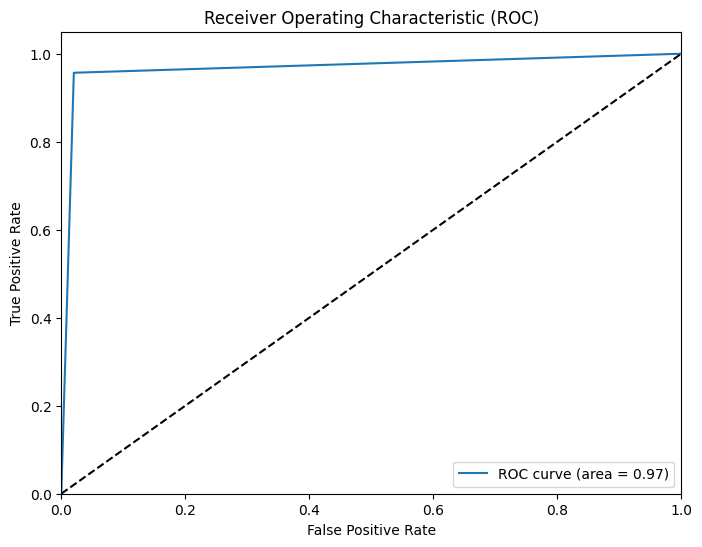

In [ ]:
# Initialize lists to store evaluation metrics
evaluation_metrics = []

# Iterate over the models and evaluate their performance
for name, model, param_grid in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),  # Feature Scaling
        ('model', model)
    ])

    # Hyperparameter tuning using RandomizedSearchCV for XG Boost
    if name == 'XG Boost':
        random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                                           n_iter=100, cv=3, verbose=0, random_state=42, n_jobs=-1)
        random_search.fit(Xr_train, yr_train)
        pipeline = random_search.best_estimator_
    # Hyperparameter tuning using GridSearchCV for other models
    elif param_grid:
        grid_search = GridSearchCV(model, param_grid, cv=2, verbose=0)
        grid_search.fit(Xr_train, yr_train)
        pipeline = grid_search.best_estimator_

    # Fit the pipeline on the training data
    pipeline.fit(Xr_train, yr_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(Xr_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(yr_test, y_pred)
    precision = precision_score(yr_test, y_pred)
    recall = recall_score(yr_test, y_pred)
    confusion = confusion_matrix(yr_test, y_pred)
    fpr, tpr, thresholds = roc_curve(yr_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Append evaluation metrics to the list
    evaluation_metrics.append({'Model': name, 'Accuracy': accuracy, 'Precision': precision,
                               'Recall': recall, 'Confusion Matrix': confusion, 'ROC AUC': roc_auc})

    # Print the performance metrics
    print("Model:", name)
    print("Test Accuracy:", accuracy.round(3),"%")
    print("Precision:", precision.round(3))
    print("Recall:", recall.round(3))
    print("Confusion Matrix:")
    print(confusion)
    print("ROC AUC:", roc_auc.round(3))
    print()

    # Plot ROC AUC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

# Convert the list to a DataFrame
evaluation_metrics_df = pd.DataFrame(evaluation_metrics)

# Retrieve the best model based on ROC AUC
best_model_roc_auc = evaluation_metrics_df.loc[evaluation_metrics_df['ROC AUC'].idxmax()]

# Print the best model based on ROC AUC
print("Best Model based on ROC AUC:")
print(best_model_roc_auc)


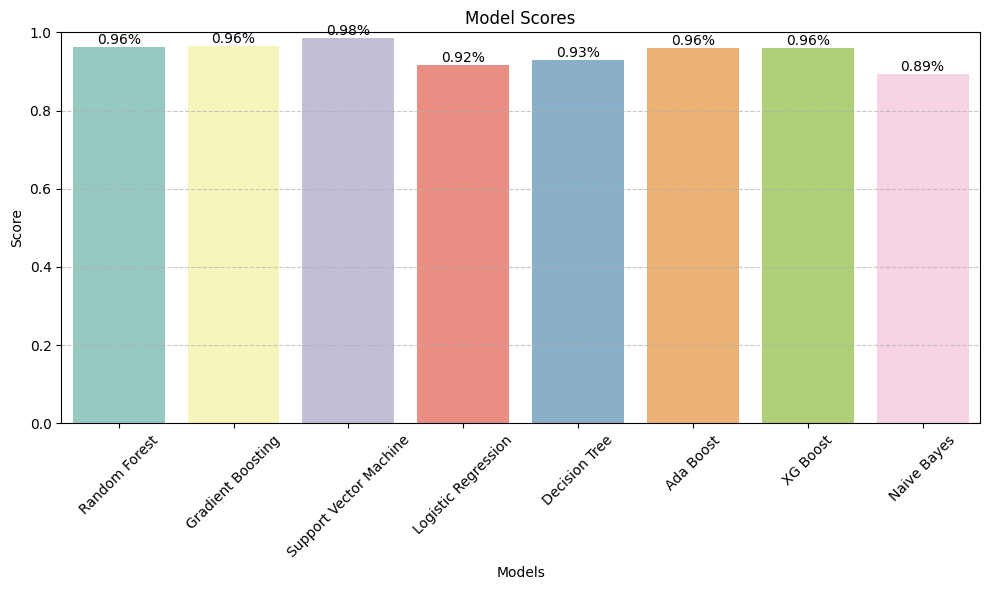

In [23]:
# Define a color palette for the bars
num_models = len(evaluation_metrics)  # Determine the number of models evaluated
colors = sns.color_palette('Set3', n_colors=num_models)  # Changed the color palette to 'Set2'

# Create a bar plot of models and their scores
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='Accuracy', data=evaluation_metrics_df, palette=colors)

# Add text on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.title('Model Scores')
plt.xlabel('Models')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()


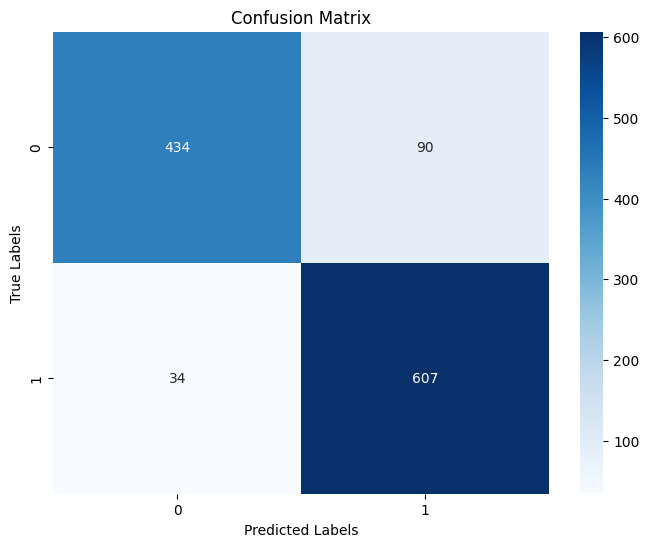

In [24]:
# Compute confusion matrix
conf_matrix = confusion_matrix(yr_test, y_pred)

# Display confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()